# Machine Learning: Assignment 6
## Comparison of Multiple Classification Methods (max. 15p)

The file `data/voice.csv` contains measurement data about voices (field explanations in English).

Try to predict the label value of the field using other fields using different machine learning methods.

Split the data into training data and test data in a ratio of 80/20%.

* Also print how much different fields affect the variable predicted by the model (importances).
* Then choose the two most important explanatory variables and print a scatter diagram from them so that the male and female points are in different colors.

# Assignment 6.1
## Data preprocessing (2 points)

Familiarize yourself with the data and
implement data preprocessing.

Missing data:
 meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...   meanfun    minfun    maxfun  \
0   274.402906  0.893369  0.491918  ...  0.084279  0.015702  0.275862   
1   634.613855  0.892193  0.513724  ...  0.107937  0.015826  0.250000   
2 

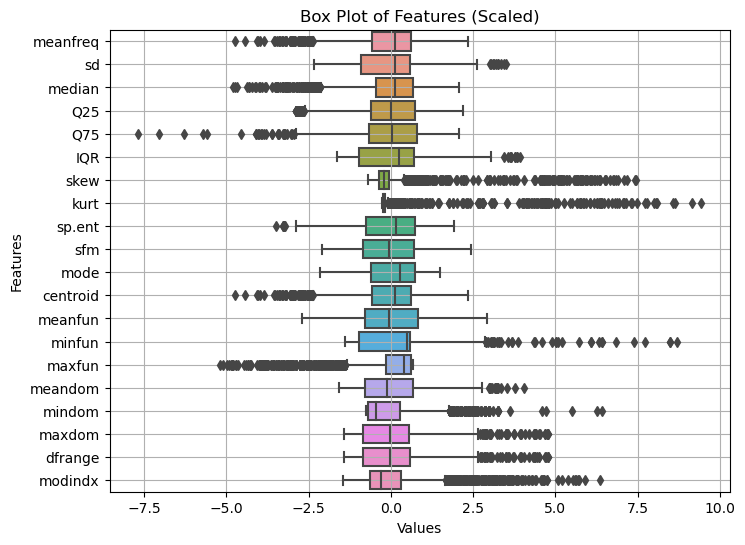

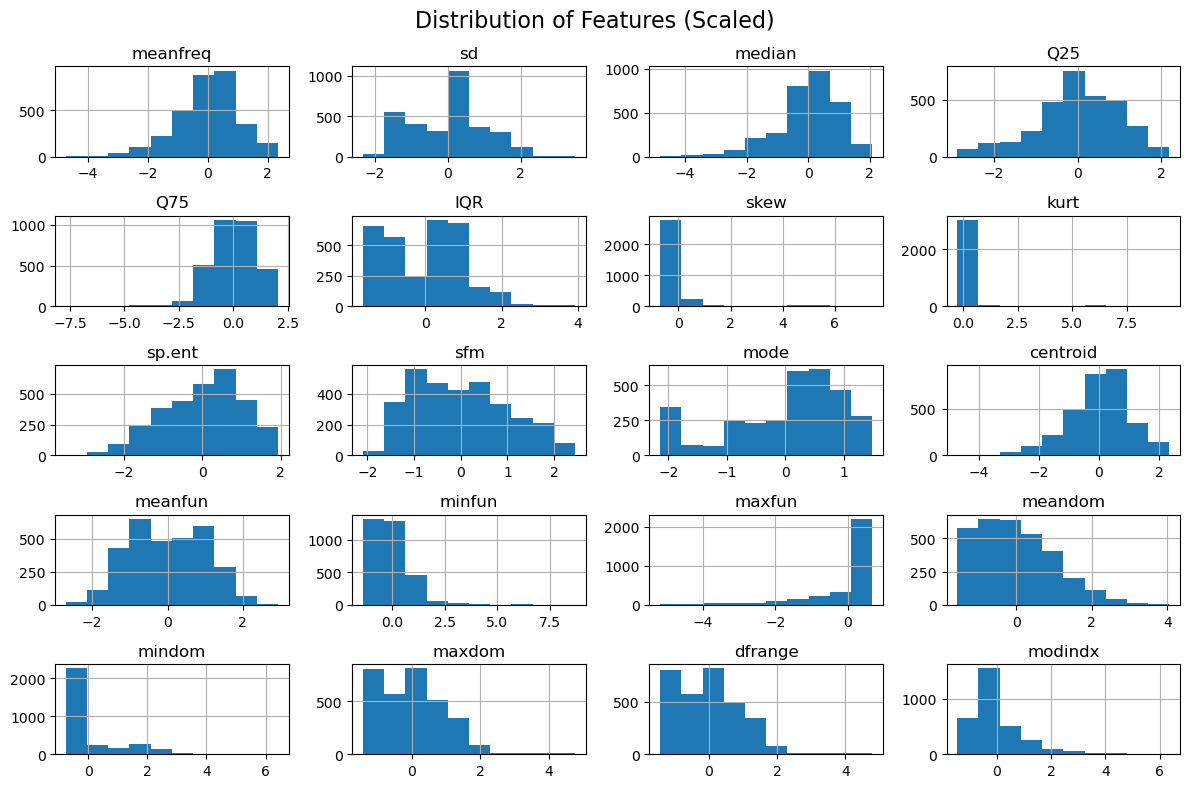

In [68]:
# TODO: Preprocessing data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/voice.csv')

missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)

# Define the mapping dictionary
label_mapping = {'male': 1, 'female': 0}

# Create the new column 'gender' based on the mapping
df['gender'] = df['label'].map(label_mapping)

print(df.head())
df_plot = df.drop(columns = ['label', 'gender'])

# Trying StandardScaler, said to be better with outlier management
# Maintains useful information about outliers.
scaler = StandardScaler()
df_scaled = df.drop(columns = ['label', 'gender'])
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df_plot.columns)

print(df_scaled.head())
      
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_scaled, orient='h')
plt.title('Box Plot of Features (Scaled)')
plt.xlabel('Values')
plt.ylabel('Features')
plt.grid(True)
plt.show()

df_scaled.hist(figsize=(12, 8))
plt.suptitle('Distribution of Features (Scaled)', fontsize=16)
plt.tight_layout()
plt.show()

## Analysis
Data distributions of **_skew_**, **_kurt_**, **_mindom_**, **_maxfun_** seem to be extremely skewed/biased and do not show a good distribution. It might be better to not use them.

# Assignment 6.2
## Training and test data (2 points)

Let's split the data into training and test sets and scale the numerical data.

In [69]:
# TODO: Splitting data
from sklearn.model_selection import train_test_split

features = df_scaled
target = df['gender']

print(features.head())
print(target.head())

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

   meanfreq        sd    median       Q25       Q75       IQR      skew  \
0 -4.049248  0.427355 -4.224901 -2.576102 -5.693607 -0.214778  2.293306   
1 -3.841053  0.611669 -3.999293 -2.486885 -5.588987 -0.258485  4.548056   
2 -3.463066  1.603848 -4.095851 -2.706986 -3.928699  0.909326  6.513656   
3 -0.992157  0.899998 -0.759454 -0.901418 -0.711205  0.632690 -0.449858   
4 -1.530640  1.322561 -1.676948 -1.268395 -0.792029  1.005588 -0.480911   

       kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0  1.762946 -0.039083  0.471575 -2.141210 -4.049248 -1.812038 -1.097998   
1  4.433008 -0.065236  0.594431 -2.141210 -3.841053 -1.079594 -1.091533   
2  7.326207 -1.083730  0.398261 -2.141210 -3.463066 -1.365368 -1.100397   
3 -0.240099  1.516383  1.797340 -1.054576 -0.992157 -1.666966 -0.988934   
4 -0.238940  1.708336  2.114740 -0.790514 -1.530640 -1.127233 -1.034015   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.565959 -1.564205 -0.708404 -1

# Assignment 6.3
## Building models (7 points)

Let's run different learning methods on the same data and save the results.
This assignment uses the following methods:

Use the following machine learning methods for classification:

1. Decision Tree (1 p)
2. Support Vector Machine   (1 p)
3. k Nearest Neighbors  (1 p)
4. Gaussian Naive Bayes (1 p)
5. Random Forest (1 p)
6. PCA and classification (2 p)

For all methods, calculate the accuracy and confusion matrix of the classification results.

Let's run different Machine learning methods on the same data and save the results.


### Decision Tree

In [70]:
# TODO: Decision Tree classification implementation
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()

# Training the classifier
clf_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = clf_dt.predict(X_test)

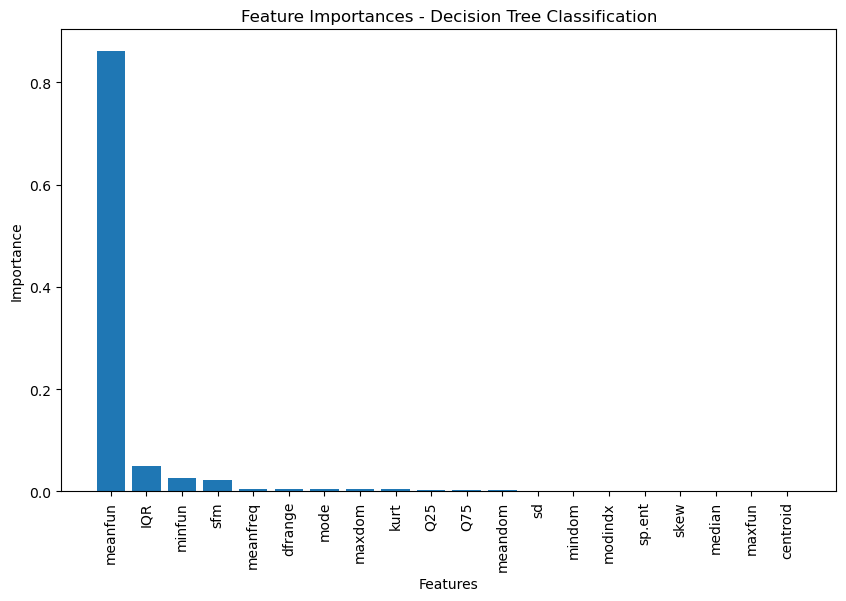

In [71]:
# TODO: Feature importances in Decision Tree classification

# Getting feature importances from the trained Decision Tree classifier
importances = clf_dt.feature_importances_

# Names of features
feature_names = features.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Decision Tree Classification")
plt.bar(range(features.shape[1]), importances[indices], align="center")
plt.xticks(range(features.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

## Analysis
Feature importances also support the prediction made from data distibutions.
Effects of features **_skew_**, **_kurt_**, **_mindom_**, **_maxfun_** might be negligible. The most important feature seems to be **_meanfun_** and **_IQR_**.

### Support Vector Machine

In [72]:
# TODO: SVC classification implementation
from sklearn.svm import SVC

clf_svm = SVC(probability=True)

# Training the classifier
clf_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = clf_svm.predict_proba(X_test)[:, 1]

### kNN

In [73]:
# TODO: kNN classification implementation
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()

# Training the classifier
clf_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = clf_knn.predict(X_test.values)

# For some reason X_test throws an error.
# 'X_test.values' seems to fix it.

C:\Users\olurt\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Naive Bayes

In [74]:
# TODO: Naive Bayes classification implementation
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()

# Training the classifier
clf_nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = clf_nb.predict(X_test)

### Random Forest

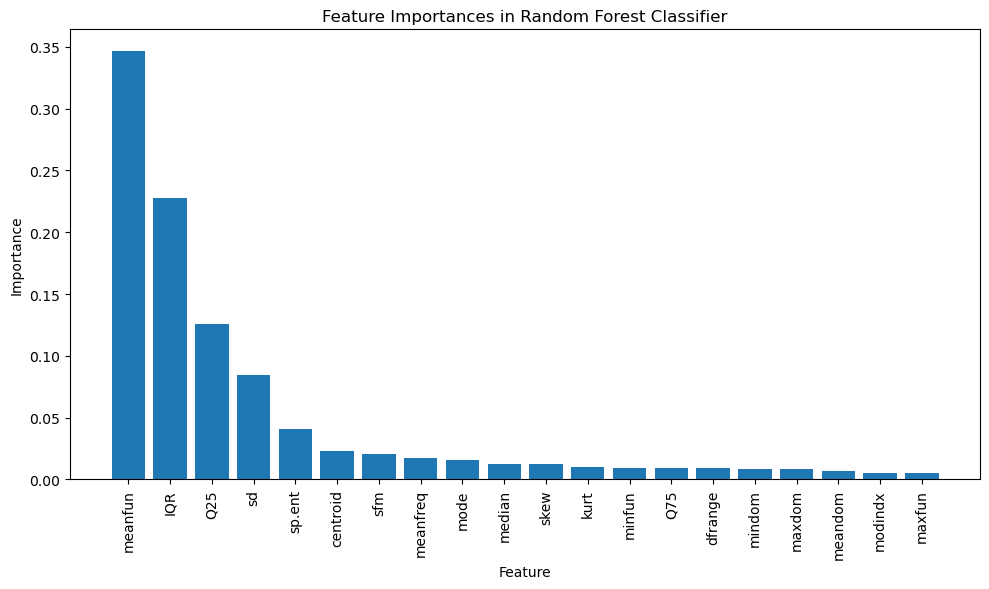

In [75]:
# TODO: Random Forest classification implementation
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

# Train the classifier
clf_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = clf_rf.predict(X_test)

feature_importances = clf_rf.feature_importances_

# Get indices of features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Get names of features sorted by importance
sorted_features = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, feature_importances[sorted_indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Classifier')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### PCA + classifier
PCA with *Random Forest Classifier* or any other classifier you want to use.

Principal Component 1:
Feature meanfreq: -0.3127071315311676
Feature sd: 0.2803263561325287
Feature median: -0.2772610210042643
Feature Q25: -0.3029287285052214
Feature Q75: -0.18857697330320314
Feature IQR: 0.2404844868624466
Feature skew: 0.13203101277270207
Feature kurt: 0.13287220038722708
Feature sp.ent: 0.22131172501935487
Feature sfm: 0.2734849230504949
Feature mode: -0.2421443494568062
Feature centroid: -0.31270713153116736
Feature meanfun: -0.1803274110904626
Feature minfun: -0.15463869151360252
Feature maxfun: -0.11499857879626463
Feature meandom: -0.2291861620843272
Feature mindom: -0.08423426960118041
Feature maxdom: -0.23430500817629282
Feature dfrange: -0.23286464025270429
Feature modindx: 0.08897102725545948

Principal Component 2:
Feature meanfreq: 0.03591732242213916
Feature sd: -0.19849818763298982
Feature median: 0.005922523823039358
Feature Q25: 0.1570163703456854
Feature Q75: -0.183237862362716
Feature IQR: -0.27990341705930843
Feature skew: 0.34761697713768897
Fea

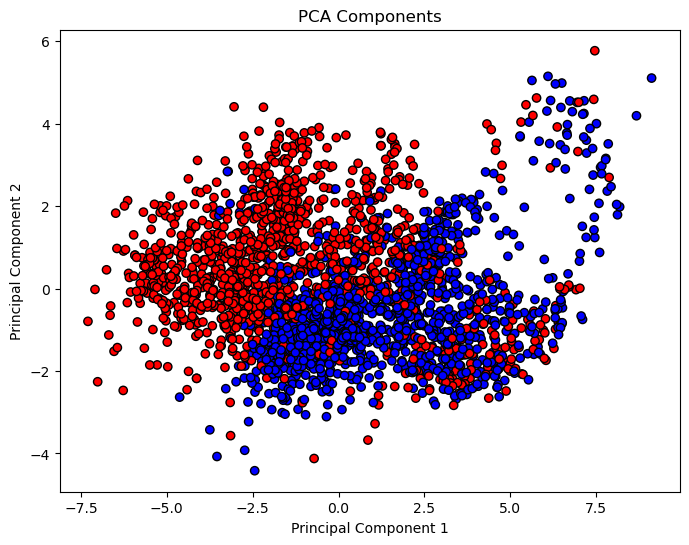

In [89]:
# TODO: PCA + selected Classifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import numpy as np

# Create a pipeline with PCA and classifier
pipeline_pca = Pipeline([
    ('pca', PCA(n_components=2)),  # Keep top 2 components
    ('clf', RandomForestClassifier())  # Classifier
])

# Train the pipeline
pipeline_pca_fit = pipeline_pca.fit(X_train, y_train)

# Make predictions
y_pred_pca = pipeline_pca_fit.predict(X_test)

# Get the principal components and their loadings
pca = pipeline_pca.named_steps['pca']
loadings = pca.components_

# Print the loadings for each principal component
for i, component in enumerate(loadings):
    print(f"Principal Component {i + 1}:")
    for j, loading in enumerate(component):
        print(f"Feature {feature_names[j]}: {loading}")
    print()

# Transform the data to the reduced space according to principal components
X_pca_transformed = pca.transform(X_train)


# Map categorical labels to colors
label_colors = {1: 'blue', 0: 'red'}
colors = np.array([label_colors[label] for label in y_train])

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], c=colors, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Components')
plt.show()

### Visualization

Drawing patterns.
Draw patterns using the two most important explanatory variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


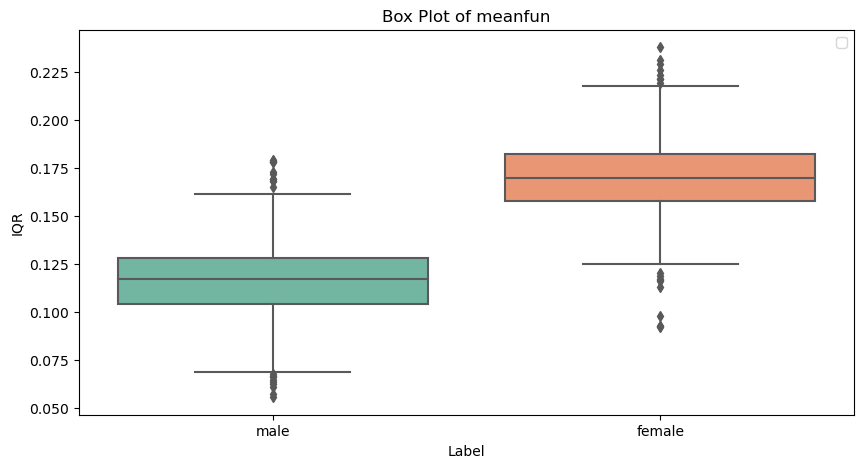

In [90]:
# TODO: Draw figure

# Plot 'meanfun' and 'IQR' for males and females
plt.figure(figsize=(10, 5))

# Plot 'meanfun' by gender
sns.boxplot(x='label', y='meanfun', data=df, palette='Set2')

# Set labels and title
plt.xlabel('Label')
plt.ylabel('IQR')
plt.title('Box Plot of meanfun')
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


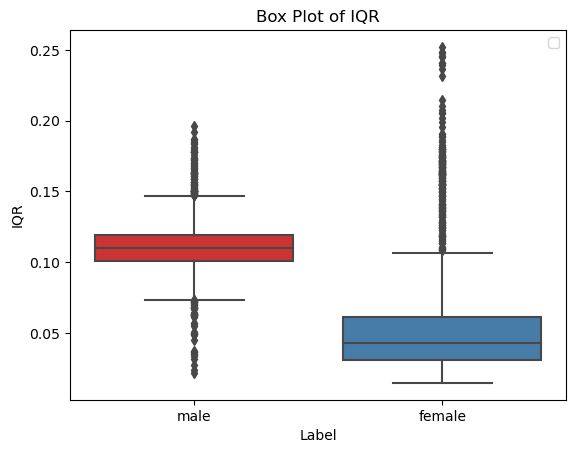

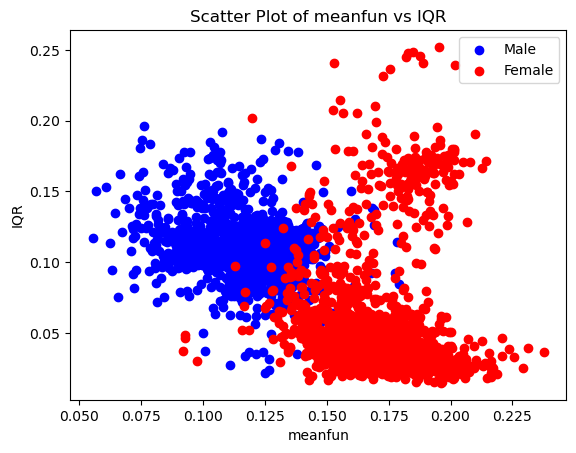

In [91]:
# TODO: Draw another figure

# Plot 'IQR' by gender
sns.boxplot(x='label', y='IQR', data=df, palette='Set1')

# Set labels and title
plt.xlabel('Label')
plt.ylabel('IQR')
plt.title('Box Plot of IQR')
plt.legend()

plt.show()

# Filter the dataframe based on the labels 'male' and 'female'
male_data = df[df['label'] == 'male']
female_data = df[df['label'] == 'female']

# Plot 'meanfun' vs 'IQR' for males
plt.scatter(male_data['meanfun'], male_data['IQR'], color='blue', label='Male')

# Plot 'meanfun' vs 'IQR' for females
plt.scatter(female_data['meanfun'], female_data['IQR'], color='red', label='Female')

# Set labels and title
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.title('Scatter Plot of meanfun vs IQR')
plt.legend()


plt.show()

# Assignment 6.4
## Analyzing and processing the results (4 p)

* Let's compare the results obtained from different classification methods
* Also try to retrieve the key features
* Draw some suitable figure using the two most important explanatory variables
* Also draw ROC curves (with AUC) when using different methods and compare how different machine learning methods progress.
* Q: How would you develop or improve learning outcomes?


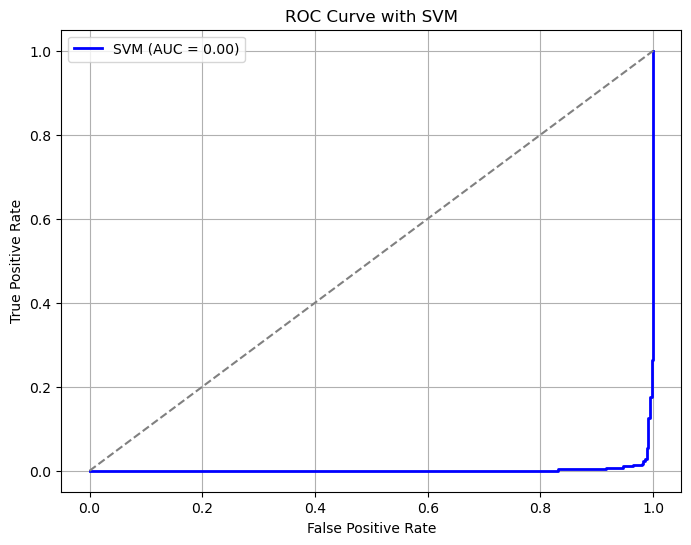

In [97]:
# TODO: ROC curve with SVM
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_pred_prob_svm = clf_svm.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_pred_prob_svm)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with SVM')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\olurt\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


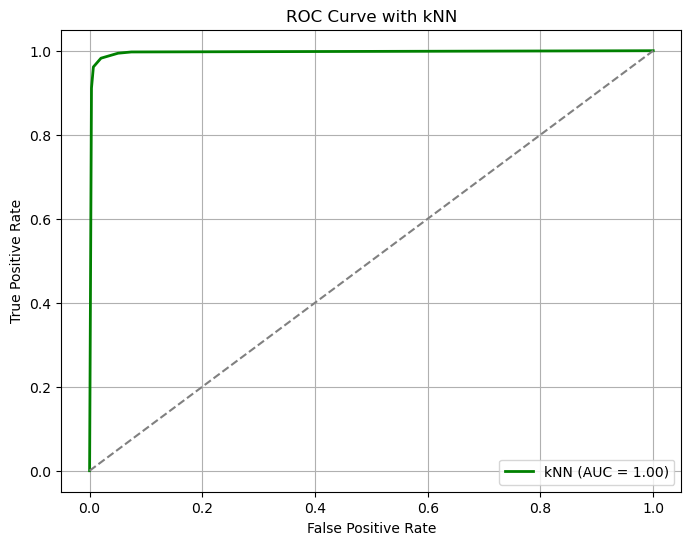

In [100]:
# TODO: ROC curve with kNN method
from sklearn.preprocessing import LabelEncoder

y_pred_prob_knn = clf_knn.predict_proba(X_test.values)[:, 1]

# Calculate ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test_encoded, y_pred_prob_knn)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'kNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with kNN')
plt.legend()
plt.grid(True)
plt.show()

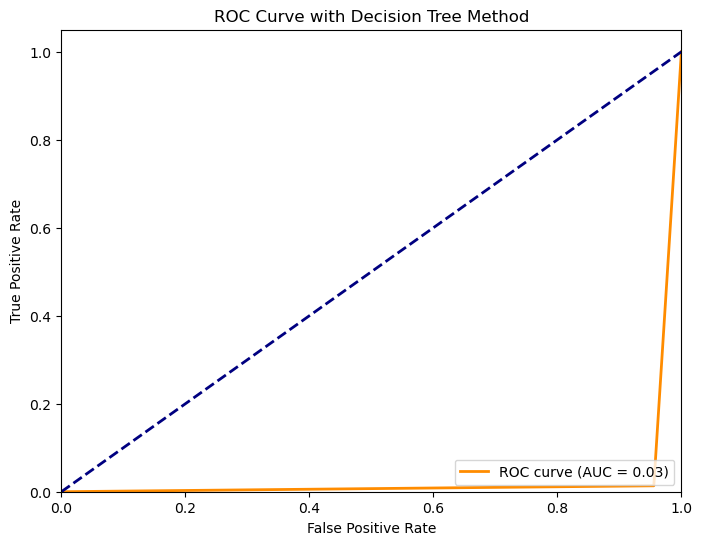

In [106]:
# TODO: ROC curve with decision tree method

y_pred_prob_dt = clf_dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Decision Tree Method')
plt.legend(loc="lower right")
plt.show()

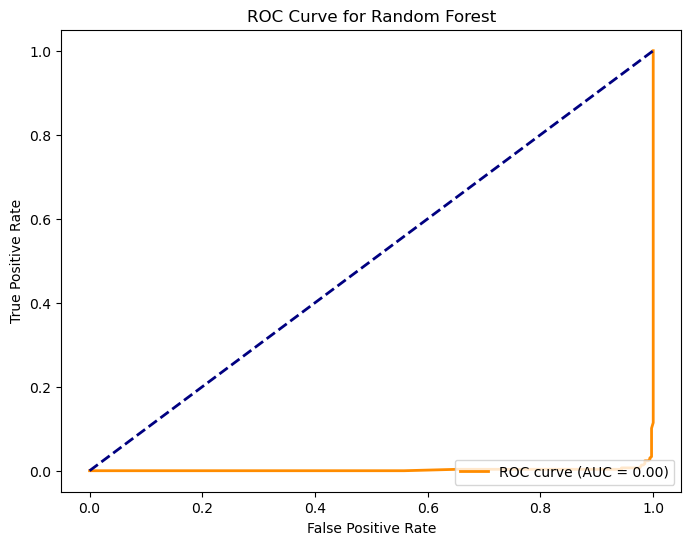

In [103]:
# TODO: ROC curve with random forest method

y_pred_prob_rf = clf_rf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_pred_prob_rf)

# Calculate the Area Under the Curve (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

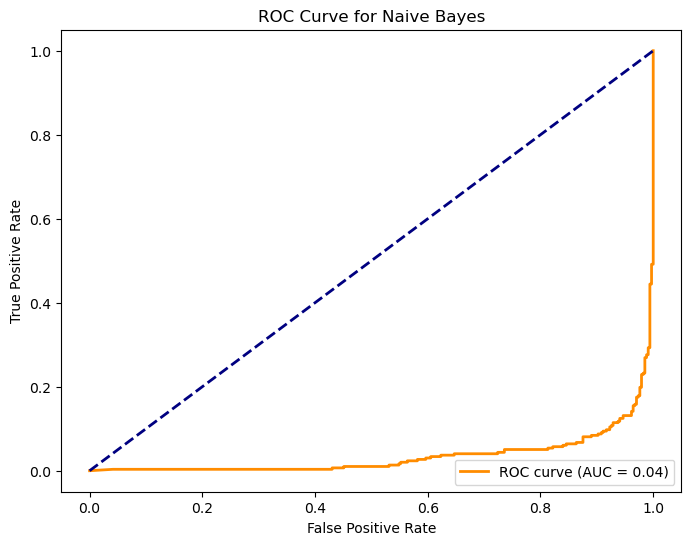

In [105]:
# TODO: ROC curve with Bayes method

# Predict probabilities of the positive class ('male')
y_pred_prob_bayes = clf_nb.predict_proba(X_test)[:, 1]

fpr_bayes, tpr_bayes, thresholds_bayes = roc_curve(y_test_binary, y_pred_prob_bayes)

# Calculate the Area Under the Curve (AUC)
roc_auc_bayes = auc(fpr_bayes, tpr_bayes)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_bayes, tpr_bayes, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_bayes:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

### Comparison of Different Classification Models

TODO: Analysis of classification results.

* Compare the classification results of different ML models.
* Are there other good classification methods to apply with this dataset?

## Analysis

AUC is a good indicator for models success in classification.

Data tested with five models


| Model | AUC Score |
|:-----------------:|:-----------------:|
| Decision Tree    | 0.03    |
| Support Vector Machine    | 0.0    |
| k Nearest Neighbors    | 1.00    |
| Gaussian Naive Bayes    | 0.04    |
| Random Forest    | 0.00    |

According to results, **k-Nearest Neighbors** model is the best performing model. k-Nearest Neighbour can be applied safely. One suggestion could be Logistic regression, it is usually used for binary classifiation.
